## 4 nodes

In [1]:
%run ../imports.py

In [2]:
G = nx.DiGraph()

In [3]:
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
    (0,1),
    (1,2),
    (1,3)
])

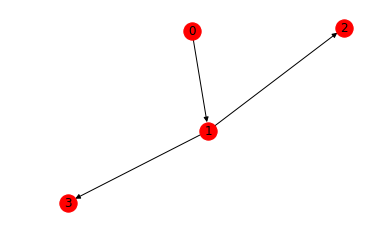

In [4]:
plt.axis('off')
nx.draw_networkx(G)

In [5]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

2

In [6]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [7]:
Q

matrix([[ 0.1464, -0.8536,  0.3536,  0.3536],
        [ 0.8536, -0.1464, -0.3536, -0.3536]])

In [8]:
sigma

array([[ 0.2226, -0.0417],
       [-0.0417,  0.694 ]])

In [9]:
posG, negG = separate_graphs(eqL)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


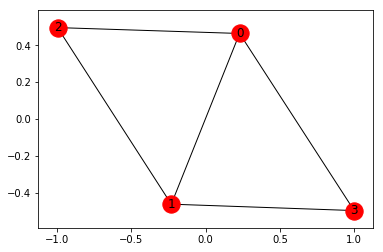

In [10]:
nx.draw_networkx(posG)

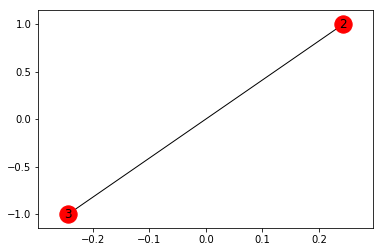

In [11]:
nx.draw_networkx(negG)

In [12]:
import dot2tex

In [13]:
a = nx.drawing.nx_agraph.to_agraph(G)

In [14]:
texcode = dot2tex.dot2tex(a.to_string(), format='tikz', crop=True)

In [15]:
print(texcode)

\documentclass{article}
\usepackage[x11names, svgnames, rgb]{xcolor}
\usepackage[utf8]{inputenc}
\usepackage{tikz}
\usetikzlibrary{snakes,arrows,shapes}
\usepackage{amsmath}
%
%

\usepackage[active,tightpage]{preview}
\PreviewEnvironment{tikzpicture}
\setlength\PreviewBorder{0pt}%

%

\begin{document}
\pagestyle{empty}
%
%
%

\enlargethispage{100cm}
% Start of code
\begin{tikzpicture}[>=latex',line join=bevel,]
%%
\node (0) at (63.0bp,162.0bp) [draw,ellipse] {0};
  \node (1) at (63.0bp,90.0bp) [draw,ellipse] {1};
  \node (2) at (27.0bp,18.0bp) [draw,ellipse] {2};
  \node (3) at (99.0bp,18.0bp) [draw,ellipse] {3};
  \draw [->] (0) ..controls (63.0bp,136.13bp) and (63.0bp,126.97bp)  .. (1);
  \draw [->] (1) ..controls (50.04bp,64.081bp) and (44.846bp,53.693bp)  .. (2);
  \draw [->] (1) ..controls (75.96bp,64.081bp) and (81.154bp,53.693bp)  .. (3);
%
\end{tikzpicture}
% End of code

%
\end{document}
%



